# UberEats配達データ分析

In [1]:
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)

In [3]:
FILE_PATH = './../data/trip_master.csv'
master = pd.read_csv(FILE_PATH, index_col='id')

In [4]:
print(len(master))
# master.head(5)

319


In [5]:
master.columns

Index(['date', 'day', 'day_of_week', 'distance', 'drive_time', 'drop_address',
       'drop_latitude', 'drop_longitude', 'drop_time', 'month',
       'pickup_address', 'pickup_latitude', 'pickup_longitude', 'pickup_time',
       'price', 'url', 'year', 'cash', 'peak'],
      dtype='object')

In [6]:
df = master.assign(
    pickup_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.pickup_time.split(':')[0]), minute=int(x.pickup_time.split(':')[1])), axis=1),
    drop_datetime= master.apply(lambda x: datetime.datetime(year=x.year, month=x.month, day=x.day, 
                                                           hour=int(x.drop_time.split(':')[0]), minute=int(x.drop_time.split(':')[1])), axis=1),    
    shop_position_id = master.apply(lambda x: str(x.pickup_latitude) + "-" + str(x.pickup_longitude), axis=1)
                  ) .drop(['date', 'day', 'year', 'url', 'pickup_latitude', 'pickup_time', 'pickup_longitude', 'pickup_address', 
                           'day_of_week', 'pickup_time', 'drop_time', "drop_address", "drop_latitude", "drop_longitude"], axis=1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 319 entries, d92f23b6-46a8-48d7-823c-8cadb9182193 to 4c9755ca-c860-472d-897a-fc0f8310927b
Data columns (total 9 columns):
distance            319 non-null float64
drive_time          319 non-null float64
month               319 non-null int64
price               319 non-null int64
cash                146 non-null float64
peak                146 non-null float64
pickup_datetime     319 non-null datetime64[ns]
drop_datetime       319 non-null datetime64[ns]
shop_position_id    319 non-null object
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 24.9+ KB


In [8]:
df['date'] = df['pickup_datetime'].dt.date
df['day_of_week_num'] = df['pickup_datetime'].dt.dayofweek
df['day_of_week'] = df['pickup_datetime'].dt.weekday_name
df['month_day_num'] = df['pickup_datetime'].dt.day
df["hour_of_day"] = df['pickup_datetime'].dt.hour
df["week_of_month"] = df['pickup_datetime'].dt.week

In [9]:
# df.head(3)

## 毎日のデータ集計

In [10]:
target_day = datetime.datetime(2020, 2, 5).date()
# target_day = datetime.datetime.today().date()
df_day = df[df["date"] == target_day].sort_values('pickup_datetime')

In [11]:
df_day

,distance,drive_time,month,price,cash,peak,pickup_datetime,drop_datetime,shop_position_id,date,day_of_week_num,day_of_week,month_day_num,hour_of_day,week_of_month
id,,,,,,,,,,,,,,,
4a1ac2e5-360e-40e3-92a1-43b6aac47818,1.98,18.3,2,439,170.0,0.0,2020-02-05 10:41:00,2020-02-05 11:09:00,35.579219818115234-139.6390380859375,2020-02-05,2,Wednesday,5,10,6
27f0d8ba-5cce-4db3-a9ad-7bbfc436f4d5,2.82,26.4,2,484,1427.0,0.0,2020-02-05 11:00:00,2020-02-05 11:38:00,35.587135314941406-139.63063049316406,2020-02-05,2,Wednesday,5,11,6
21850175-3fd0-4338-92da-52b7e980ba9e,1.83,12.6,2,431,0.0,0.0,2020-02-05 11:43:00,2020-02-05 11:57:00,35.56867599487305-139.63685607910156,2020-02-05,2,Wednesday,5,11,6
99247016-cceb-4dff-a4be-7a0647c609d4,1.14,26.1,2,394,2570.0,0.0,2020-02-05 12:19:00,2020-02-05 12:50:00,35.57918167114258-139.66363525390622,2020-02-05,2,Wednesday,5,12,6
df374e5b-4aea-4c17-afc6-3a483eb245a0,1.75,15.3,2,428,0.0,0.0,2020-02-05 12:59:00,2020-02-05 13:18:00,35.57497024536133-139.65922546386722,2020-02-05,2,Wednesday,5,12,6
5c6a8f00-ea90-44e7-990d-7647c7c6b070,1.79,9.8,2,429,0.0,0.0,2020-02-05 13:22:00,2020-02-05 13:40:00,35.580684661865234-139.66152954101562,2020-02-05,2,Wednesday,5,13,6
4403a548-3acd-44f0-8348-b1a06bc4804b,2.72,14.3,2,479,3522.0,0.0,2020-02-05 18:06:00,2020-02-05 18:26:00,35.57691955566406-139.65902709960938,2020-02-05,2,Wednesday,5,18,6
f508e2db-815e-4a8c-98f8-a997a69eb22b,1.42,12.2,2,409,0.0,0.0,2020-02-05 18:31:00,2020-02-05 18:50:00,35.58027267456055-139.66241455078122,2020-02-05,2,Wednesday,5,18,6
a95c2380-b9f1-415f-8f25-5eeb85bb8eb7,1.98,15.8,2,439,1341.0,0.0,2020-02-05 18:58:00,2020-02-05 19:23:00,35.57722854614258-139.65911865234378,2020-02-05,2,Wednesday,5,18,6


In [12]:
drive_count = len(df_day)
drive_hours = round(df_day["drive_time"].sum() / 60, 1)
drive_length = round(df_day["distance"].sum() , 2)
total_price = df_day["price"].sum()
long_count = len(df_day[df_day["distance"] >= 2])
cash_count = len(df_day[df_day["cash"] != 0])
peak_count = len(df_day[df_day["peak"] != 0])
peak_sum = int(df_day[df_day["peak"] != 0].sum()["peak"])

In [13]:
print("{}  配達件数: {}件, 配達時間: {}h, 配達距離: {}km, 配達報酬: {}円, ロングドロップ{}件, ピーク{}件({}円), 現金{}件"
      .format(target_day, drive_count, drive_hours, drive_length, total_price, long_count, peak_count, peak_sum, cash_count))

2020-02-05  配達件数: 9件, 配達時間: 2.5h, 配達距離: 17.43km, 配達報酬: 3932円, ロングドロップ2件, ピーク0件(0円), 現金5件


## 日別の集計

In [14]:
groupby = df.groupby('date')

In [15]:
df_by_day = pd.DataFrame()
df_by_day["配達件数"] = groupby["pickup_datetime"].count()
df_by_day["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_day["配達距離(km)"] = groupby["distance"].sum()
df_by_day["配達報酬(円)"] = groupby["price"].sum()
df_by_day["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_day["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_day["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_day["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_day["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [16]:
df_by_day.index.name = '月日'
df_by_day.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月日,,,,,,,,,
2019-12-15,9,3.6,12.91,4559,2,0,0,16.5,3.64
2019-12-16,7,2.1,6.48,3119,0,0,0,19.4,3.10
2019-12-17,3,1.5,5.29,1588,1,0,0,16.8,3.57
2019-12-18,7,3.4,18.90,3570,4,0,0,10.7,5.61
2019-12-19,11,4.0,24.32,5492,6,0,0,9.9,6.04
2019-12-24,11,3.6,15.82,5341,0,0,0,13.6,4.41
2019-12-25,1,0.3,1.03,388,0,0,0,17.2,3.49
2019-12-26,9,2.8,18.76,4778,5,0,0,9.0,6.66
2019-12-29,18,3.9,26.12,9286,2,0,0,8.9,6.74


## 週別の集計

In [17]:
groupby = df.groupby('week_of_month')

In [18]:
df_by_week = pd.DataFrame()
df_by_week["配達件数"] = groupby["pickup_datetime"].count()
df_by_week["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_week["配達距離(km)"] = groupby["distance"].sum()
df_by_week["配達報酬(円)"] = groupby["price"].sum()
df_by_week["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_week["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_week["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_week["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_week["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [19]:
df_by_week.index.name = '週番号'
df_by_week.tail(30)

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
週番号,,,,,,,,,
1,26,6.5,40.66,12875,7,0,0,9.6,6.23
2,59,15.0,88.88,26269,13,0,0,10.1,5.93
3,42,10.4,67.94,20883,13,13,22,9.2,6.51
4,31,7.5,56.67,14836,11,5,19,8.0,7.52
5,51,13.2,87.63,26421,14,16,30,9.1,6.62
6,22,5.5,38.95,9416,6,0,8,8.5,7.07
50,21,8.5,36.08,9938,7,0,0,14.1,4.26
51,28,11.0,54.99,13769,11,0,0,12.0,5.01
52,39,10.6,61.73,19793,7,0,0,10.3,5.84


## 月別の集計

In [20]:
groupby = df.groupby('month')
df_by_month = pd.DataFrame()
df_by_month["配達件数"] = groupby["pickup_datetime"].count()
df_by_month["配達時間(h)"] = round(groupby["drive_time"].sum() / 60, 1)
df_by_month["配達距離(km)"] = groupby["distance"].sum()
df_by_month["配達報酬(円)"] = groupby["price"].sum()
df_by_month["ロングドロップ"] = groupby.apply(lambda x: x[x.distance >= 2]['distance'].count())
df_by_month["ピーク件数"] = groupby.apply(lambda x: x[x.peak != 0]['peak'].count())
df_by_month["現金件数"] = groupby.apply(lambda x: x[x.cash != 0]['cash'].count())
df_by_month["1kmの時間(分)"] = round(groupby["drive_time"].sum() / groupby["distance"].sum(), 1)
df_by_month["時速"] = round(groupby["distance"].sum()/(groupby["drive_time"].sum()/60), 2)

In [21]:
df_by_month.index.name = '月'
df_by_month

,配達件数,配達時間(h),配達距離(km),配達報酬(円),ロングドロップ,ピーク件数,現金件数,1kmの時間(分),時速
月,,,,,,,,,
1,168,42.3,275.81,79884,48,24,56,9.2,6.52
2,51,12.9,87.95,25579,14,10,23,8.8,6.82
12,100,33.1,169.77,48737,27,0,0,11.7,5.13


## 全データ分析

Text(0.5, 1.0, '曜日ごとの配達回数')

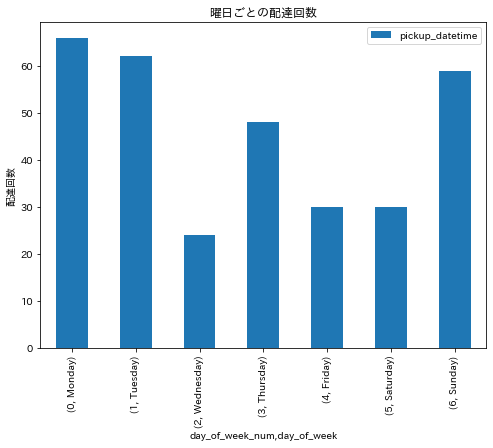

In [22]:
uber_weekdays = df.pivot_table(index=['day_of_week_num','day_of_week'],
                                  values='pickup_datetime',
                                  aggfunc='count')
uber_weekdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('曜日ごとの配達回数')

Text(0.5, 1.0, '日にちごとの配達回数')

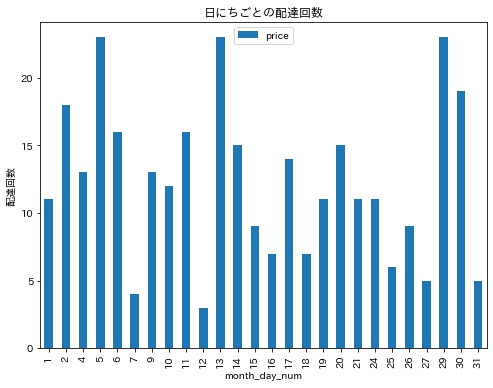

In [23]:
uber_monthdays = df.pivot_table(index=['month_day_num'],
                                  values='price',
                                  aggfunc='count')
uber_monthdays.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('日にちごとの配達回数')

Text(0.5, 1.0, '時間ごとの配達回数')

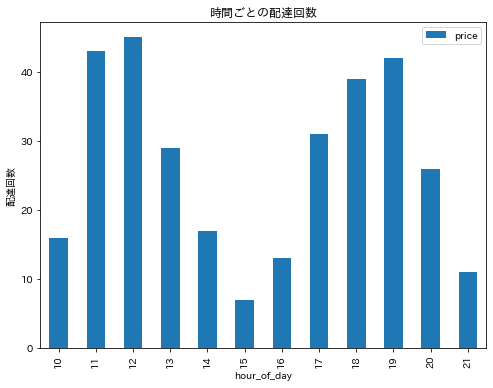

In [24]:
uber_hour = df.pivot_table(index=['hour_of_day'],
                                  values='price',
                                  aggfunc='count')
uber_hour.plot(kind='bar')
plt.ylabel('配達回数')
plt.title('時間ごとの配達回数')

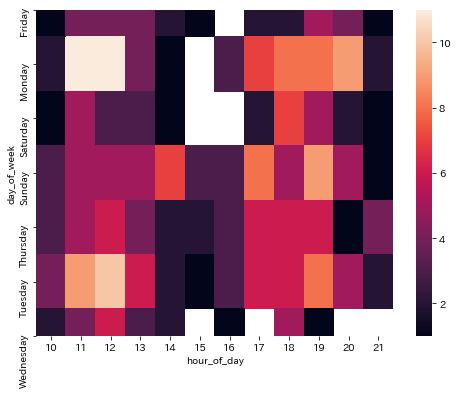

In [25]:
def count_rows(rows):
    return len(rows)

by_cross = df.groupby('day_of_week hour_of_day'.split()).apply(count_rows).unstack()
sns.heatmap(by_cross)